### Data Mining and Machine Learning
### Recommendation system using Deep Learning
#### Edgar Acuna
#### March 2019
#### Using deep Learning neural to create a book recommendation system based on a database of 10000 books and 
####  the ratimgs of 53424   usuarios

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('c://esma4016/books_ratings.csv')
dataset.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [3]:
train, test = train_test_split(dataset, test_size=0.2, random_state=42)
n_users = len(dataset.user_id.unique())
n_books = len(dataset.book_id.unique())
print('number of users:',n_users,"number of books:",n_books)

number of users: 53424 number of books: 10000


In [4]:
#Building the model
from keras.layers import Input, Embedding, Flatten, Dot, Dense
from keras.models import Model
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)
prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [5]:
#Training the model using only 5 epochs
history = model.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
model.save('regression_model.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
785404/785404 [==============================] - 273s 348us/step - loss: 13.3784
Epoch 2/5
785404/785404 [==============================] - 275s 351us/step - loss: 4.1535
Epoch 3/5
785404/785404 [==============================] - 299s 381us/step - loss: 1.7370
Epoch 4/5
785404/785404 [==============================] - 266s 339us/step - loss: 1.1848
Epoch 5/5
785404/785404 [==============================] - 265s 338us/step - loss: 0.9608


In [6]:
# Extract embeddings
book_em = model.get_layer('Book-Embedding')
book_em_weights = book_em.get_weights()[0]
book_em_weights.shape

(10001, 5)

### Visualizing the embeddings using PCA

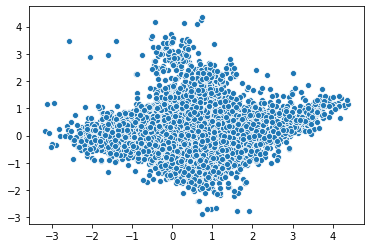

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as pyplt
import seaborn as sns
%matplotlib inline
pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

### Visualizing the embeddings using TSNE

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10001 samples in 0.015s...
[t-SNE] Computed neighbors for 10001 samples in 1.404s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10001
[t-SNE] Computed conditional probabilities for sample 2000 / 10001
[t-SNE] Computed conditional probabilities for sample 3000 / 10001
[t-SNE] Computed conditional probabilities for sample 4000 / 10001
[t-SNE] Computed conditional probabilities for sample 5000 / 10001
[t-SNE] Computed conditional probabilities for sample 6000 / 10001
[t-SNE] Computed conditional probabilities for sample 7000 / 10001
[t-SNE] Computed conditional probabilities for sample 8000 / 10001
[t-SNE] Computed conditional probabilities for sample 9000 / 10001
[t-SNE] Computed conditional probabilities for sample 10000 / 10001
[t-SNE] Computed conditional probabilities for sample 10001 / 10001
[t-SNE] Mean sigma: 0.134392
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.569908
[t-SNE] KL

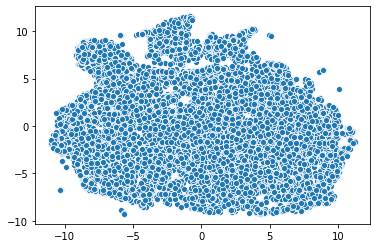

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(book_em_weights)
sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])

#### Creating dataset for making recommendations for the first user

In [8]:
# Creating dataset for making recommendations for the first user
import numpy as np
book_data = np.array(list(set(dataset.book_id)))
user = np.array([1 for i in range(len(book_data))])
predictions = model.predict([user, book_data])
predictions = np.array([a[0] for a in predictions])
recommended_book_ids = (-predictions).argsort()[:5]
#showing the top-5 recommended books
print(recommended_book_ids)

[8998 7638 7152 8258 7660]


In [9]:
#Ratings for the recommended books
print(predictions[recommended_book_ids])

[4.2397513 4.145306  4.073554  4.0051455 3.937897 ]


In [10]:
books = pd.read_csv('c://esma4016/books.csv')
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [11]:
print(books[books['id'].isin(recommended_book_ids)])

        id   book_id  best_book_id   work_id  books_count        isbn  \
7151  7152    625554      20178265    611921            8  159038363X   
7637  7638     12009         12009   2465248           28  1597800449   
7659  7660     21330         21330      2910           15  1401204864   
8257  8258  18594594      18594594  26341000           41   345547497   
8997  8998    292740        292740   2457130           37  2266071289   

            isbn13                                            authors  \
7151  9.781590e+12                                     Gerald N. Lund   
7637  9.781598e+12                                      Iain M. Banks   
7659  9.781401e+12  Bill Willingham, Mark Buckingham, Steve Leialo...   
8257  9.780346e+12                                    Karin Slaughter   
8997  9.782266e+12                                 Lorenzo Carcaterra   

      original_publication_year  \
7151                     1994.0   
7637                     2004.0   
7659             